<b>SOME PRE PROCESSING STEPS</b>

Imputation of missing values<br>
Outlier removal<br>
Scaling<br>
One-hot encoding<br>
ordinal encoding<br>
oversampling and under sampling<br>

<b> PERFORMANCE EVALUATION

# <b>LOGISTIC REGRESSION

<b>PROPERTIES OF INPUT DATA</b>

  * <b> LINEARITY :</b> Linear relationship between input features and the log-odds of the response variable
  * <b> MULTICOLLINEARITY :</b> No high multicollinearity b/w features
  * <b> No Outliers
  * <b> Encoding of Categorical features
  * <b> Handling Missing Values

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sma
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Heart_disease.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are all the classes of target variable 'CVD' fairly represented by records in the considered dataset ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df["CVD"].value_counts()

0    3596
1     644
Name: CVD, dtype: int64

<Axes: ylabel='CVD'>

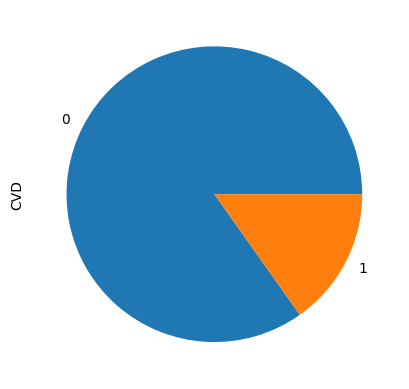

In [ ]:
df["CVD"].value_counts().plot(kind="pie")

In [ ]:
X=data.drop('CVD',axis=1)
Y=data['CVD']

model=sma.Logit(Y,sma.add_constant(X)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.400810
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4082
Model:                          Logit   Df Residuals:                     4074
Method:                           MLE   Df Model:                            7
Date:                Tue, 09 Jan 2024   Pseudo R-squ.:                 0.05625
Time:                        17:49:13   Log-Likelihood:                -1636.1
converged:                       True   LL-Null:                       -1733.6
Covariance Type:            nonrobust   LLR p-value:                 1.283e-38
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.2179      0.124    -17.815      0.000      -2.462      -1.974
male                0.4934      0.092      5.339      0.000       0.312       0.675
education          -0.1181      0.045     -2.601      0.009      -0.207      -0.029
currentSmoker       0.1434      0.093      1.543      0.123      -0.039       0.326
BPMeds              0.5459      0.210      2.595      0.009       0.134       0.958
prevalentStroke     0.9008      0.437      2.061      0.039       0.044       1.757
prevalentHyp        0.9001      0.094      9.554      0.000       0.715       1.085
diabetes            1.0179      0.216      4.714      0.000       0.595       1.441
===================================================================================
"""

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [ ]:
model.pvalues

const              2.566039e-31
male               3.528866e-07
age                1.921049e-21
education          3.335308e-01
currentSmoker      6.478285e-01
cigsPerDay         4.083450e-03
BPMeds             4.880213e-01
prevalentStroke    1.565187e-01
prevalentHyp       8.972781e-02
diabetes           9.012046e-01
totChol            3.849918e-02
sysBP              5.243701e-05
diaBP              5.183106e-01
BMI                6.009754e-01
heartRate          4.408166e-01
glucose            1.422015e-03
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Identify the features from the dataset that are involved in multicollinearity. After that, split the updated data using train_test_split.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[]
for i in range(X.shape[1]):
  vif.append(variance_inflation_factor(X.values,i))

pd.DataFrame({"Feature":X.columns,"VIF":vif}).sort_values(by="VIF",ascending=False)


,Feature,VIF
10,sysBP,137.990950
11,diaBP,136.502294
12,BMI,45.377821
1,age,40.569218
13,heartRate,38.578765
9,totChol,32.171894
14,glucose,19.739637
3,currentSmoker,4.932308
2,education,4.650989
4,cigsPerDay,4.291149


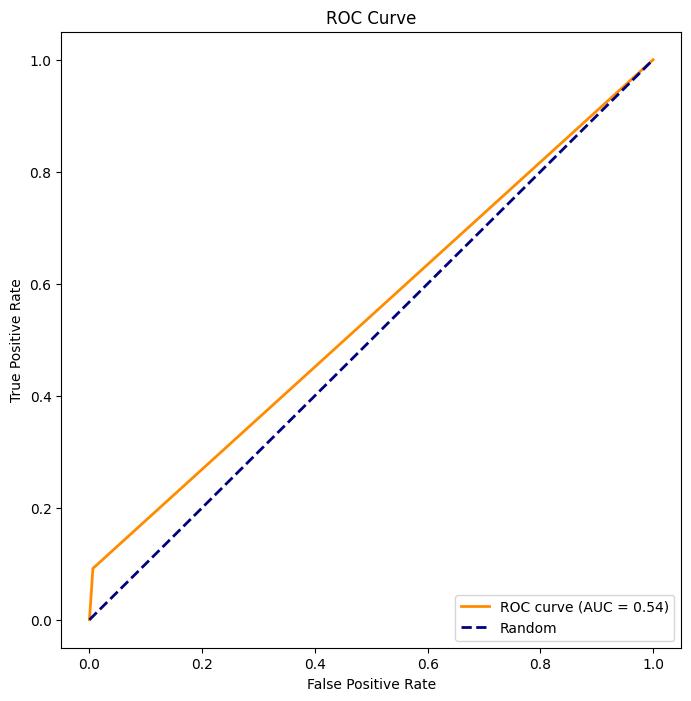

In [ ]:
from sklearn.metrics import roc_curve,auc



fpr, tpr, thresholds = roc_curve(Y, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the optimal value threshold for the full model using the Youden's index.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

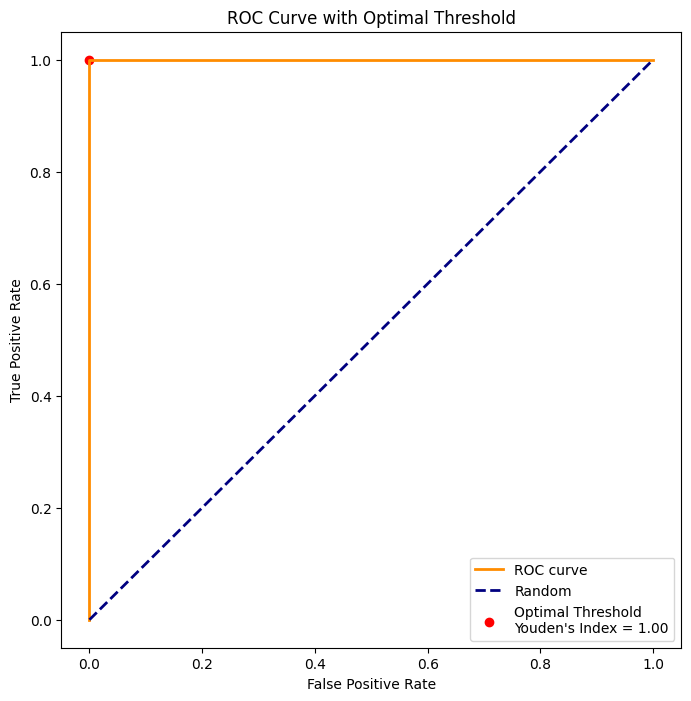

Optimal Threshold: 0.6


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_true contains true labels (0 or 1) and y_prob contains predicted probabilities
y_true = np.array([1, 0, 1, 1, 0, 0, 1, 0])
y_prob = np.array([0.8, 0.3, 0.6, 0.7, 0.2, 0.1, 0.9, 0.4])

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

# Calculate Youden's Index for each threshold
youden_index = tpr - fpr

# Find the optimal threshold that maximizes Youden's Index
optimal_threshold = thresholds[np.argmax(youden_index)]

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.scatter(fpr[np.argmax(youden_index)], tpr[np.argmax(youden_index)], c='red', marker='o', label=f'Optimal Threshold\nYouden\'s Index = {youden_index.max():.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Optimal Threshold')
plt.legend(loc='lower right')
plt.show()

print("Optimal Threshold:", optimal_threshold)

#<b>2. K MEANS CLUSTURING

* SCALE THE FEATURES
* SENSITIVE TO IRRELEVANT FEATURES - REMOVE IRRELEVANT FEATURES
* High Correlation between Features - Remove it or use PCA to reduce Multicollinarity
* Impute or remove missing values
* ENCODING(Optional step) - One-hot encoding or ordinal encoding
* Outlier removal
* Curse of Dimensionality
* Number of Neighbors (k)
* Distance Metric
     * Euclidean Distance : Continuous Numerical Data:
     * Manhatten Distance : categorical data
* Class Imbalance - use oversampling or undersampling

<b><i> IDENTIFYING THE RIGHT VALUE OF K

In [ ]:
# GRID SEARCH METHOD

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define a range of k values to search
k_values = list(range(1, 21))

param_grid = {'n_neighbors': k_values}

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best value of k from the grid search
best_k = grid_search.best_params_['n_neighbors']

In [ ]:
# ELBOW PLOT METHOD

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculate accuracy for different k values
k_values = list(range(1, 21))
accuracy_values = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    accuracy = knn_classifier.score(X_validation, y_validation)
    accuracy_values.append(accuracy)

# Plot the accuracy values
plt.plot(k_values, accuracy_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Choosing k')
plt.show()

# Identify the k value at the "elbow"
best_k = k_values[accuracy_values.index(max(accuracy_values))]

<b><i>OVER SAMPLING AND UNDER SAMPLING FOR CLASS IMBALANCE

In [ ]:
# (OVERSAMPLING )increase the number of minority class

from imblearn.over_sampling import RandomOverSampler, SMOTE

# Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
# (UNDERSAMPLING )increase the number of minority class
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# NearMiss
nm = NearMiss(version=1)
X_resampled, y_resampled = nm.fit_resample(X, y)


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier (you can choose the number of neighbors, 'n_neighbors')
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_rep)

NameError: name 'load_iris' is not defined

#<b> 3. NAIVE BAYES CLASSIFIER

* Encoding of Categorical features
* Handling Imbalanced Datastes
* Dealing with missing values
* Feature Scaling (naive Bayes is not that sensitive to Scale)
* Handling Outliers

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#<b> 4. DECISION TREE

  * Decision trees can handle missing values naturally
  * Encoding Categorical Variables into numerical format
  * don't need to perform feature scaling
  * consider techniques such as resampling (oversampling or undersampling)
  * Outlier Detection and Handling

Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



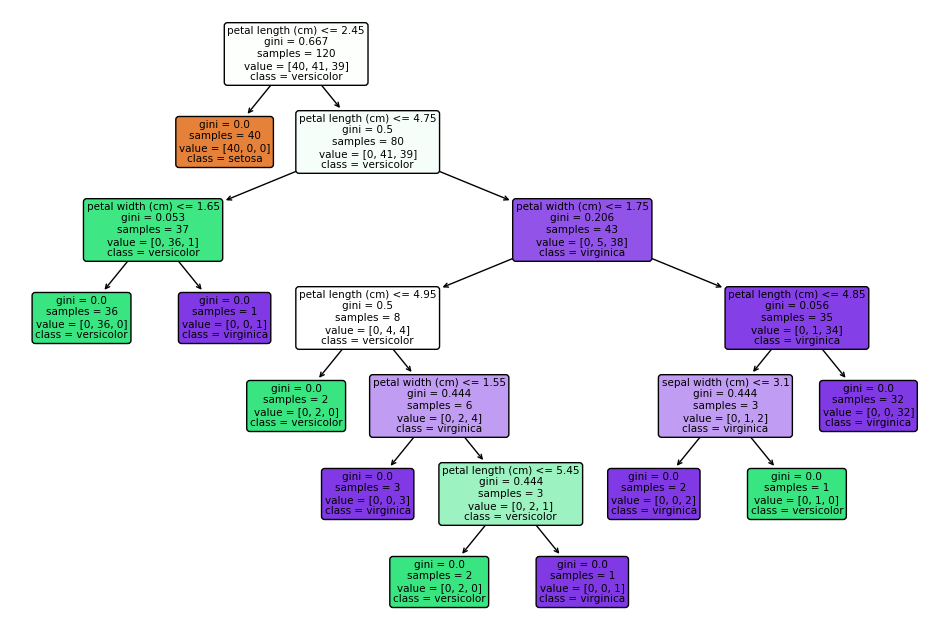

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

In [5]:
# GRID SEARCH IN DECISION TREE

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Define a parameter grid to search through
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters on the entire training set
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Test Accuracy with Best Model:", accuracy)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Test Accuracy with Best Model: 1.0


#<b> 5.RANDOM FOREST

  * can handle missing values, but imputing or removing them might improve performance.
  * Encoding Categorical Variables
  * Scaling or Standardization not required
  * imbalanced class - use oversampling and undersampling
  * Handling Outliers
  * Addressing Multicollinearity
  * Validation and Cross-Validation

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



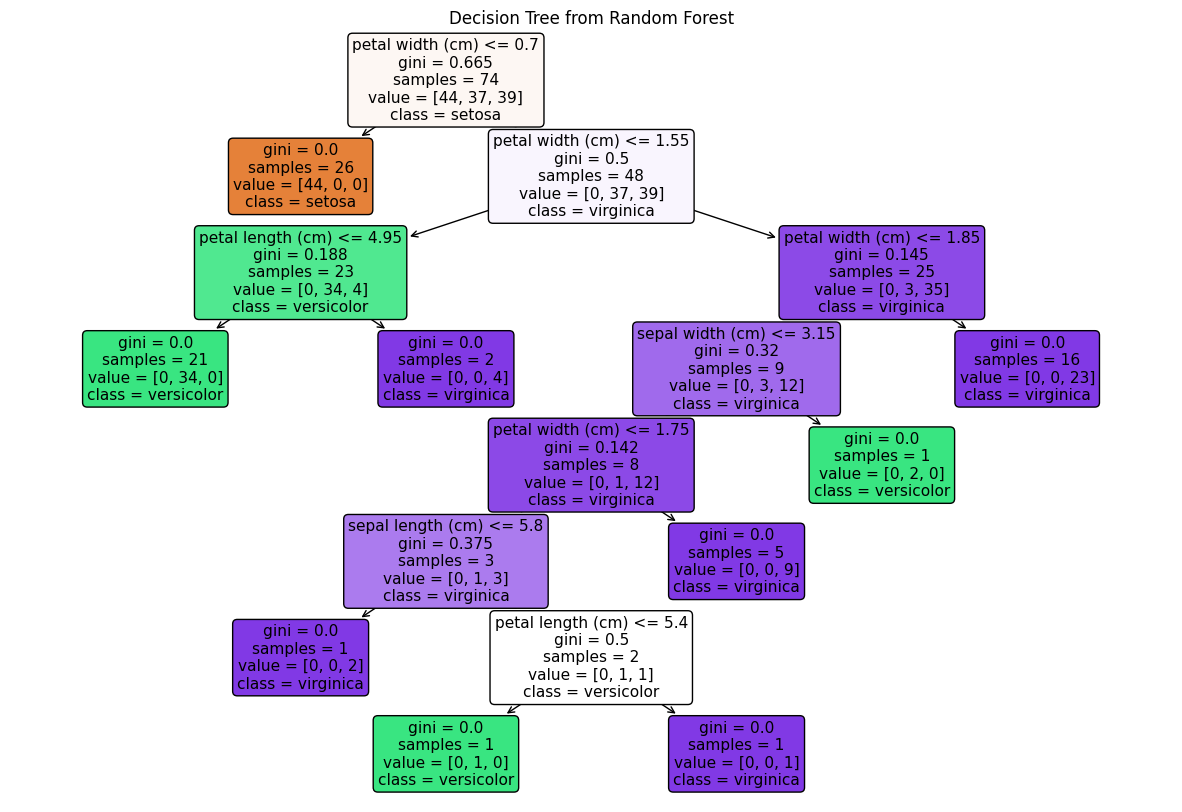

In [6]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Visualize an individual decision tree from the Random Forest
plt.figure(figsize=(15, 10))
plot_tree(random_forest.estimators_[0], feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree from Random Forest")
plt.show()


In [9]:
random_forest.feature_importances_

array([0.10809762, 0.03038681, 0.43999397, 0.42152159])

#<b>6. BOOSTING TECHNIQUES

  * Feature Scaling
  * Handling Categorical Features
  * Handling Missing Values
  * Removing Outliers
  * Feature Selection
  * Handling Duplicates

# <b> ADABOOST

In [10]:
# Feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostClassifier

base_classifier = DecisionTreeClassifier()
ada_classifier = AdaBoostClassifier(base_classifier)

rfe = RFE(ada_classifier, n_features_to_select=5)
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)


In [11]:
# EXAMPLE

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a base learner (Decision Tree in this case)
base_classifier = DecisionTreeClassifier(max_depth=1)  # Shallow decision tree as a weak learner

# Initialize the AdaBoost classifier with the base learner
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#<b> GRADIENT BOOSTING

In [13]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
# You can adjust hyperparameters such as learning_rate, n_estimators, max_depth, etc.
gb_classifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best hyperparameters to initialize the final model
best_gb_classifier = GradientBoostingClassifier(**best_params, random_state=42)

# Train the final model
best_gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_gb_classifier.predict(X_test)

# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print(f"\nFinal Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

Final Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# <b> XGBOOST

In [15]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

